In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from matplotlib import pyplot
import numpy as np
import xgboost

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.preprocessing import MinMaxScaler

/home/mlp/anaconda3/envs/SML/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/mlp/anaconda3/envs/SML/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/mlp/anaconda3/envs/SML/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
df = pd.read_csv('train.csv', header = None)
df = df.set_index(df.columns[0])
df = df.iloc[0: , :]
df.head()

,1,2,3,4,5,6,7,8,9,10,...,952,953,954,955,956,957,958,959,960,961
0,,,,,,,,,,,,,,,,,,,,,
1,-1.8226,8.51070,-0.53551,-2.03440,2.2282,2.04870,-5.81380,-4.4169,2.3129,0.808290,...,-5.74060,12.5650,41.23100,-6.77570,1.72780,15.9120,23.583000,3.9158,35.7250,1
2,1.2816,-0.49410,-0.19667,1.05510,-1.9280,1.07120,-0.19667,-4.6669,3.8230,-3.245900,...,-20.50300,47.7540,2.88560,-6.86660,6.29350,-4.8789,-1.300100,-1.4275,-3.4192,1
3,-2.0304,-0.27552,-0.58236,-5.95250,7.3550,2.16640,-4.71510,17.1580,15.5120,-0.822280,...,-10.71800,-4.5436,1.38680,-5.32100,-6.08350,-1.3021,-10.569000,-4.2189,-1.6538,1
4,-1.0026,0.41320,0.62058,-0.34226,-0.2027,-0.92619,0.61123,-2.0824,-3.5442,-0.043659,...,-2.90100,4.5538,-0.77261,4.25520,0.27911,4.7744,-5.695200,-18.7410,58.3810,1
5,1.2754,25.84200,5.80000,2.89000,3.1957,4.45040,5.99760,-6.4947,2.9189,3.202700,...,-0.97276,3.8810,7.13330,0.70157,-1.69570,1.2263,-0.093752,-1.7140,2.5131,1


In [5]:
# training data
df = df.sample(frac = 1)
X_train = df.iloc[:,:-1]
y_train = df.iloc[:,-1]

print("X_train shape:", X_train.shape, "| y_train shape:", y_train.shape)


X_train shape: (9388, 960) | y_train shape: (9388,)


In [6]:
# test data
X_test= pd.read_csv('test.csv', header=None)
X_test = X_test.set_index(X_test.columns[0])
X_test.head()
print("X_test shape:", X_test.shape)

X_test shape: (2959, 960)


In [7]:
# minmaxscale data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [93]:

from imblearn.over_sampling import SMOTE, KMeansSMOTE
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import TomekLinks, RandomUnderSampler
from imblearn.under_sampling import EditedNearestNeighbours, AllKNN

# strategy = {}

smote = SMOTE(sampling_strategy='minority', random_state=42)

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X_train, y_train)
# x_smote_tomek, y_smote_tomek = SMOTETomek(random_state=42).fit_resample(X_train, y_train)
x_smote_enn, y_smote_enn = SMOTEENN(random_state=42).fit_resample(X_train, y_train)


In [94]:
print("x_smote shape:", x_smote.shape, "| y_smote shape:", y_smote.shape)

x_smote shape: (9954, 960) | y_smote shape: (9954,)


In [95]:
strategy = Counter(y_train)
for key, val in strategy.items():
    if key < 11:
        strategy[key] = 200
        
    else:
        strategy[key] = val
    
print(strategy)

x_rus, y_rus = RandomUnderSampler(sampling_strategy=strategy).fit_resample(X_train, y_train)
x_rus_smote, y_rus_smote = SMOTETomek(sampling_strategy='all', random_state=42).fit_resample(x_rus, y_rus)

Counter({10: 200, 5: 200, 3: 200, 2: 200, 8: 200, 1: 200, 9: 200, 4: 200, 7: 200, 6: 200, 13: 196, 12: 195, 20: 195, 16: 194, 19: 193, 17: 193, 18: 190, 15: 190, 11: 190, 14: 190, 24: 98, 26: 98, 27: 98, 21: 98, 23: 97, 28: 97, 29: 97, 22: 97, 25: 96, 30: 95, 38: 49, 40: 49, 33: 49, 31: 49, 37: 49, 34: 48, 35: 48, 39: 48, 32: 48, 36: 47, 42: 25, 41: 24, 43: 24, 46: 24, 48: 24, 45: 24, 49: 24, 47: 24, 44: 24})


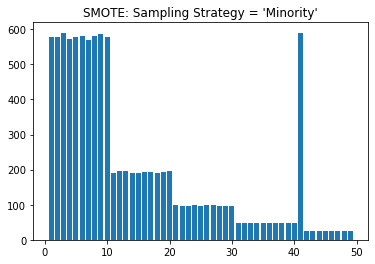

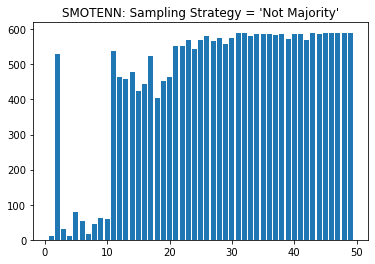

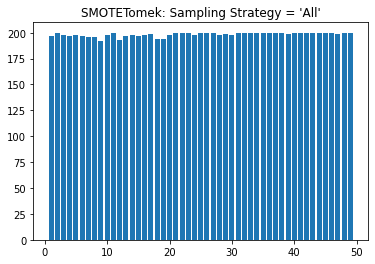

Resample dataset shape Counter({2: 200, 11: 200, 21: 200, 22: 200, 23: 200, 25: 200, 26: 200, 27: 200, 31: 200, 32: 200, 33: 200, 34: 200, 35: 200, 36: 200, 37: 200, 38: 200, 40: 200, 41: 200, 42: 200, 43: 200, 44: 200, 45: 200, 46: 200, 48: 200, 49: 200, 17: 199, 29: 199, 39: 199, 47: 199, 3: 198, 5: 198, 10: 198, 14: 198, 16: 198, 20: 198, 24: 198, 28: 198, 30: 198, 1: 197, 4: 197, 6: 197, 13: 197, 15: 197, 7: 196, 8: 196, 18: 194, 19: 194, 12: 193, 9: 192})


In [97]:
pyplot.bar(Counter(y_smote).keys(), Counter(y_smote).values())
pyplot.title("SMOTE: Sampling Strategy = 'Minority'")
pyplot.show()

pyplot.bar(Counter(y_smote_enn).keys(), Counter(y_smote_enn).values())
pyplot.title("SMOTENN: Sampling Strategy = 'Not Majority'")
pyplot.show()

pyplot.bar(Counter(y_rus_smote).keys(), Counter(y_rus_smote).values())
pyplot.title("RUS + SMOTETomek: Sampling Strategy = 'All'")
pyplot.show()
print('Resample dataset shape', Counter(y_rus_smote))

# Class Weights

In [60]:
def class_weight(labels_dict,mu=0.15):
    total = sum(labels_dict.values())
    keys = labels_dict.keys()
    weight = dict()
    
    for i in keys:
            score = np.log(mu*total/float(labels_dict[i]))
            weight[i] = score if score > 1 else 1
            
    return weight
# random labels_dict

labels_dict = dict(Counter(y_train))
weights = class_weight(labels_dict)


In [61]:
weights

{38: 3.3582472739744063,
 10: 1,
 24: 2.665100093414461,
 5: 1,
 3: 1,
 13: 1.9719529128545157,
 26: 2.665100093414461,
 34: 3.378866561177142,
 2: 1,
 8: 1,
 1: 1,
 9: 1,
 4: 1,
 19: 1.9873773831801473,
 17: 1.9873773831801473,
 7: 1,
 30: 2.696190680484492,
 16: 1.9822094130217047,
 12: 1.977068013521286,
 36: 3.3999199703749743,
 18: 2.0030434999245466,
 6: 1,
 41: 4.072013741737087,
 15: 2.0030434999245466,
 35: 3.378866561177142,
 40: 3.3582472739744063,
 11: 2.0030434999245466,
 25: 2.6857193806171966,
 43: 4.072013741737087,
 46: 4.072013741737087,
 33: 3.3582472739744063,
 23: 2.67535659358165,
 28: 2.67535659358165,
 29: 2.67535659358165,
 14: 2.0030434999245466,
 42: 4.031191747216832,
 31: 3.3582472739744063,
 27: 2.665100093414461,
 22: 2.67535659358165,
 39: 3.378866561177142,
 37: 3.3582472739744063,
 48: 4.072013741737087,
 20: 1.977068013521286,
 21: 2.665100093414461,
 45: 4.072013741737087,
 49: 4.072013741737087,
 32: 3.378866561177142,
 47: 4.072013741737087,
 44: 4

In [13]:
rows, cols = x_smote.shape
x_smote_tmp = np.random.rand(rows, cols + 1)
x_smote_tmp[:,:-1] = x_smote
x_smote_tmp[:, -1] = y_smote

# rows2, cols2 = x_smote_tomek.shape
# x_smote_tomek_tmp = np.random.rand(rows2, cols2 + 1)
# x_smote_tomek_tmp[:,:-1] = x_smote_tomek
# x_smote_tomek_tmp[:, -1] = y_smote_tomek

# rows3, cols3 = x_smote_enn.shape
# x_smote_enn_tmp = np.random.rand(rows3, cols3 + 1)
# x_smote_enn_tmp[:,:-1] = x_smote_enn
# x_smote_enn_tmp[:, -1] = y_smote_enn

rows4, cols4 = x_rus_smote.shape
x_rus_smote_tmp = np.random.rand(rows4, cols4 + 1)
x_rus_smote_tmp[:,:-1] = x_rus_smote
x_rus_smote_tmp[:, -1] = y_rus_smote

print(type(x_smote_tmp))
print(x_smote_tmp.shape)

# print(type(x_smote_tomek_tmp))
# print(x_smote_tomek_tmp.shape)

# print(type(x_smote_enn_tmp))
# print(x_smote_enn_tmp.shape)
# print(x_smote_tmp[1,:])

<class 'numpy.ndarray'>
(9954, 961)
<class 'numpy.ndarray'>
(28872, 961)
<class 'numpy.ndarray'>
(22315, 961)


In [9]:
type(X_test)
pd.DataFrame(x_smote_tmp).to_csv("train_smote.csv", header=None)
pd.DataFrame(X_test).to_csv("test_smote.csv", header=None)

# type(X_test)
# pd.DataFrame(x_smote_tomek_tmp).to_csv("train_smote_tomek.csv", header=None)
# # pd.DataFrame(X_test).to_csv("test_smote_tomek.csv", header=None)

# type(X_test)
# pd.DataFrame(x_smote_tmp).to_csv("train_smote_enn.csv", header=None)

type(X_test)
pd.DataFrame(x_smote_tmp).to_csv("train_rus_smote.csv", header=None)
# pd.DataFrame(X_test).to_csv("test_smote_enn.csv", header=None)
# pd.DataFrame(X_test).to_csv("test_smote.csv", header=None, index=None)

In [10]:
print(X_test.shape)

(2959, 960)
